# Projet 2 – Quel est le prix de vente idéal pour cette maison ?

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import norm, skew
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, LassoCV, Ridge, RidgeCV, BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
import warnings
warnings.filterwarnings(action="ignore")

## 1. Data Analysis

In [202]:
dataset = pd.read_csv('housing_dataset.csv', sep=",", decimal='.')
#1460 x 81 columns

dataset = dataset.drop(['Id'], axis=1)
#On supprime la première colonne 'ID'

dataset.head()
#1460 x 80 columns

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [203]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

##  Missing Values

In [204]:
def Missing_Counts( Data, NoMissing=True ) : 
    missing = Data.isnull().sum()  
    
    if NoMissing==False :
        missing = missing[ missing>0 ]
        
    missing.sort_values( ascending=False, inplace=True )  
    Missing_Count = pd.DataFrame( { 'Column Name':missing.index, 'Missing Count':missing.values } ) 
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['Missing Count'].apply( lambda x: '{:.2%}'.format(x/Data.shape[0] ))
    return  Missing_Count

Missing_Counts(dataset).head(20)

,Column Name,Missing Count,Percentage(%)
0,PoolQC,1453,99.52%
1,MiscFeature,1406,96.30%
2,Alley,1369,93.77%
3,Fence,1179,80.75%
4,FireplaceQu,690,47.26%
5,LotFrontage,259,17.74%
6,GarageYrBlt,81,5.55%
7,GarageCond,81,5.55%
8,GarageType,81,5.55%
9,GarageFinish,81,5.55%


<AxesSubplot:>

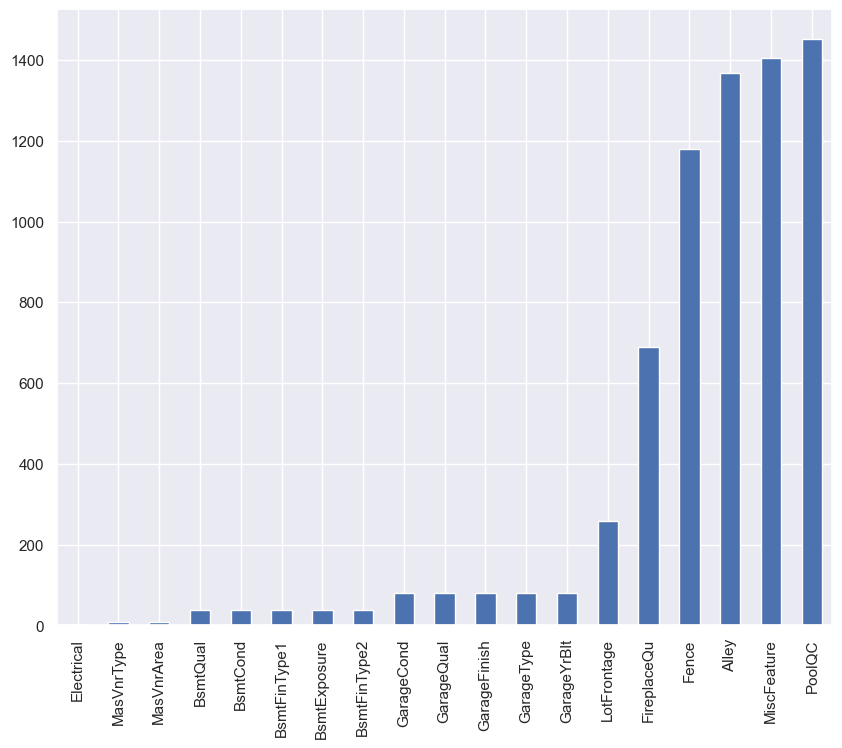

In [205]:
missing=dataset.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(10,8))
missing.plot.bar() 

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

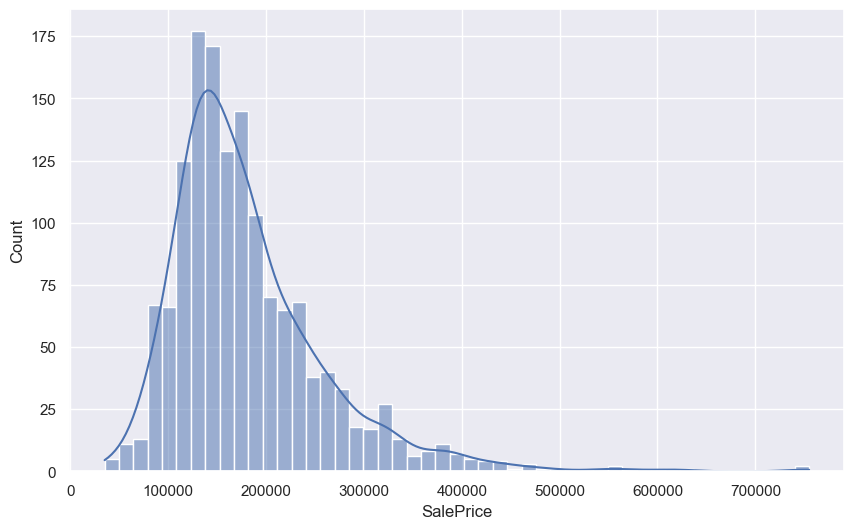

In [206]:
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(dataset['SalePrice'], kde=True, bins='auto')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

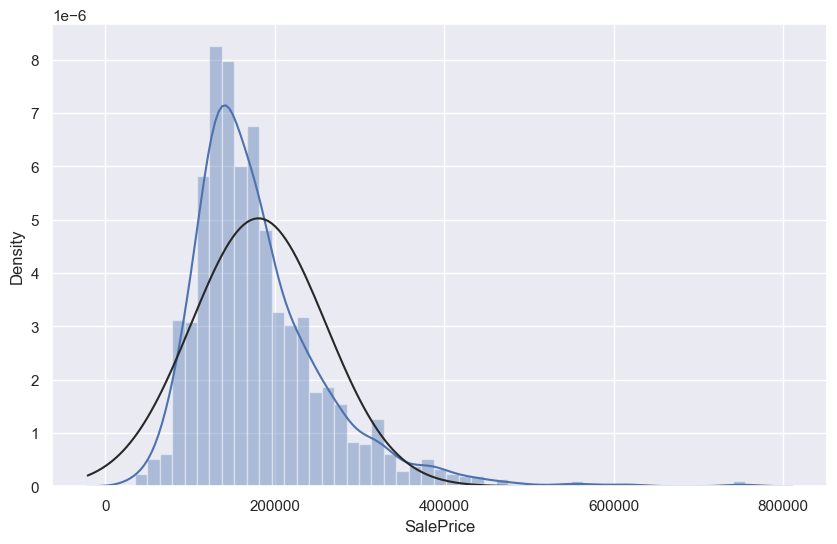

In [207]:
sns.distplot(dataset['SalePrice'], fit=norm)

In [208]:
train = np.log1p(dataset['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

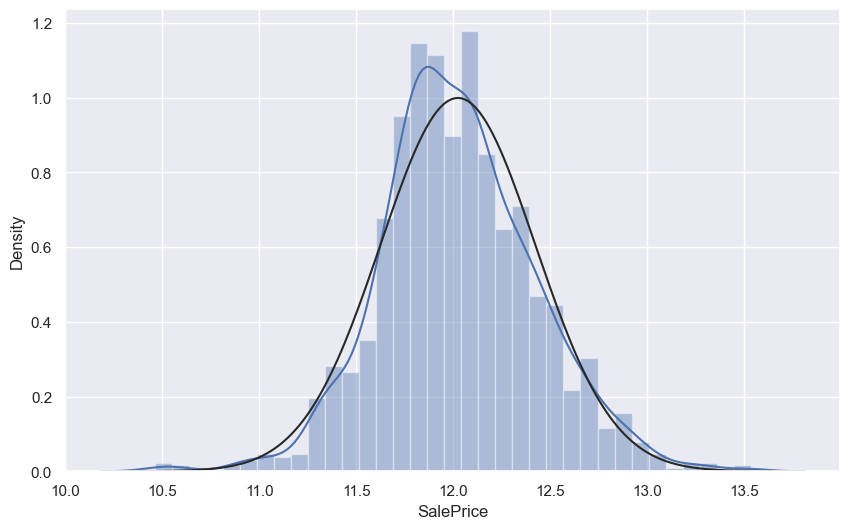

In [209]:
sns.distplot(train, fit=norm)

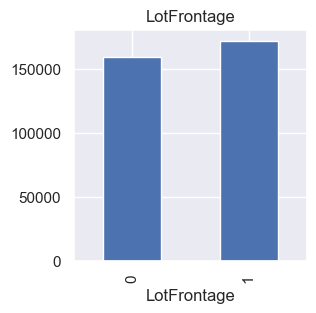

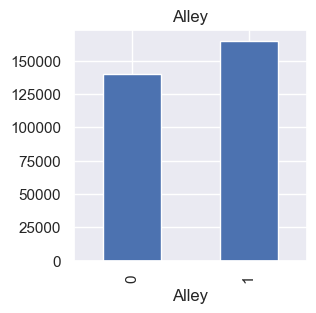

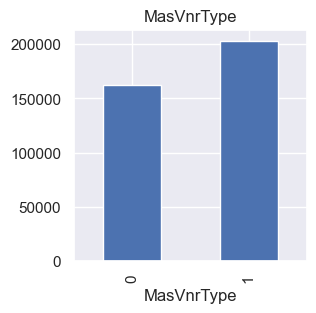

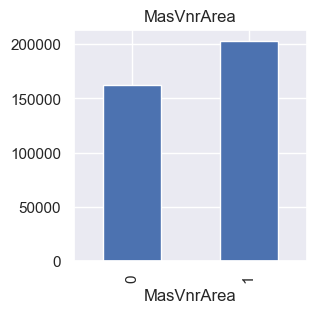

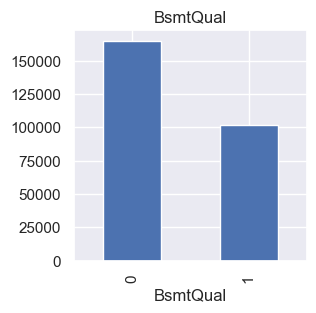

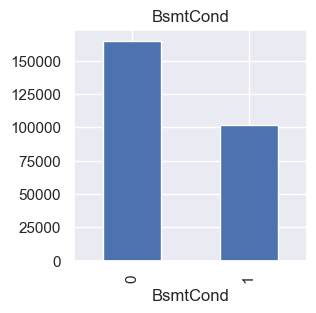

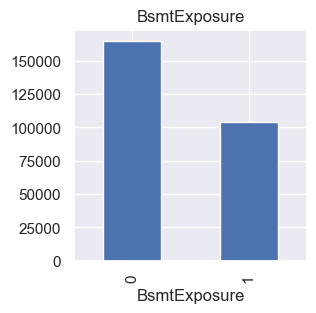

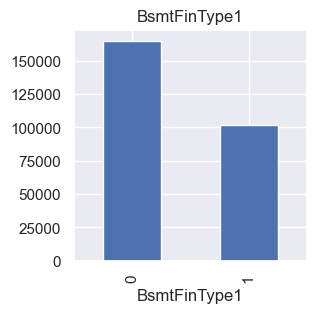

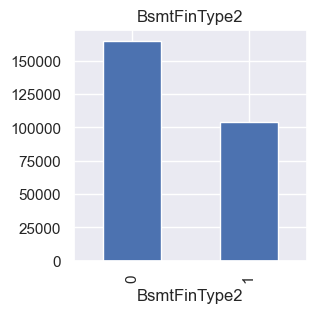

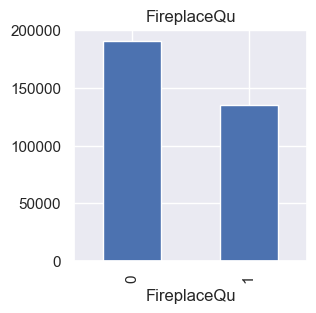

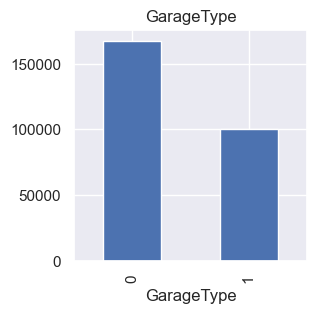

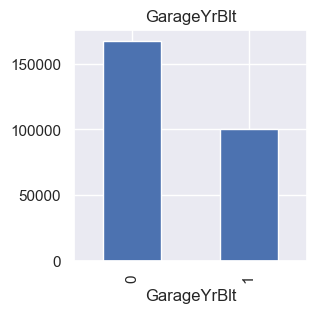

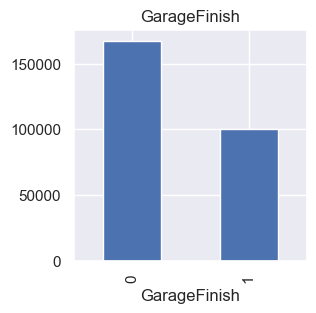

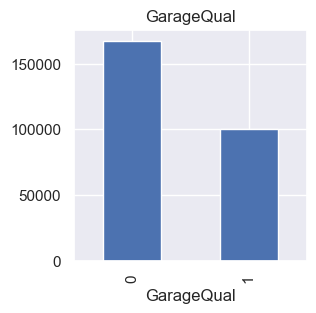

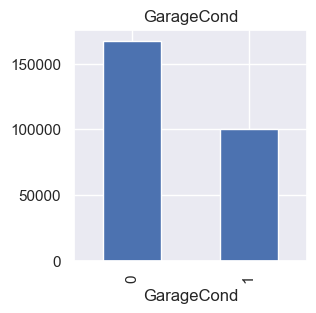

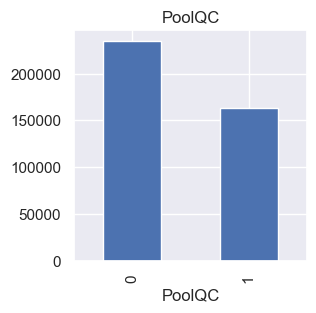

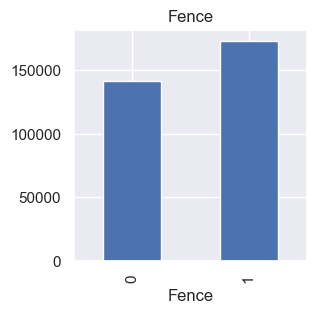

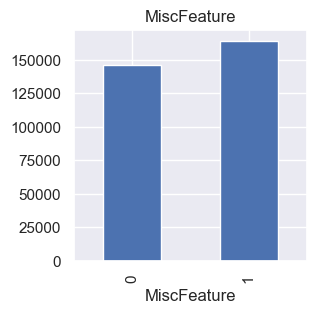

In [210]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    data = dataset.copy()
    #making a var taht indicates 1 if observation was missing
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    # Caculating mean SalePrice where the information is missing or present
    plt.figure(figsize=(3,3))
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

La relation entre les valeurs manquantes et la variable dépendante est clairement visible

## 3. Preprocesing

## Remplacer les valeurs manquantes dans les variables texte

In [211]:
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1 and dataset[feature].dtype== 'O']
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [212]:
#Nous avons remplacé les valeurs par une nouvelle étiquette
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


## Valeurs numériques manquantes

In [213]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [214]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


Étant donné que les variables numériques sont des données asymétriques, nous effectuerons une distribution log-normale

In [215]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [216]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


Encoding colonnes de catégorie

In [217]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [218]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,3,4.174387,9.041922,1,2,0,1,1,0,...,2,0,2,2008,4,4,12.247694,0,0,0
1,20,3,4.382027,9.169518,1,2,0,1,1,2,...,2,0,5,2007,4,4,12.109011,0,0,0
2,60,3,4.219508,9.328123,1,2,1,1,1,0,...,2,0,9,2008,4,4,12.317167,0,0,0
3,70,3,4.094345,9.164296,1,2,1,1,1,1,...,2,0,2,2006,4,1,11.849398,0,0,0
4,60,3,4.430817,9.565214,1,2,1,1,1,2,...,2,0,12,2008,4,4,12.429216,0,0,0


## Feature Scaling

In [219]:
feature_scale=[feature for feature in dataset.columns if feature not in ['SalePrice']]
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [220]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [221]:
data = pd.concat([dataset[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [222]:
data.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,...,1.0,0.5,0.0,0.090909,0.50,0.5,0.8,0.0,0.0,0.0
1,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,...,1.0,0.5,0.0,0.363636,0.25,0.5,0.8,0.0,0.0,0.0
2,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,...,1.0,0.5,0.0,0.727273,0.50,0.5,0.8,0.0,0.0,0.0
3,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,...,1.0,0.5,0.0,0.090909,0.00,0.5,0.2,0.0,0.0,0.0
4,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,...,1.0,0.5,0.0,1.000000,0.50,0.5,0.8,0.0,0.0,0.0


## Feature Selection

In [223]:
# Capturing the dependant feature
Y_train = data[['SalePrice']]

In [224]:
# Dropping dependant feature from dataset
X_train = data.drop(['SalePrice'],axis=1)

In [225]:
# Applying Feature Selection
# First selecting the Lasso Regression model
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, Y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [226]:
feature_sel_model.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [227]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 82
selected features: 18


In [228]:
X_train = X_train[selected_feat]
X_train.head()

,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,SaleCondition
0,0.235294,0.625000,0.666667,0.883333,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.833333,0.666667,0.50,0.8
1,0.000000,0.833333,0.555556,0.433333,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.833333,0.666667,0.50,0.8
2,0.235294,0.625000,0.666667,0.866667,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.833333,0.666667,0.50,0.8
3,0.294118,0.708333,0.666667,0.333333,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.333333,0.333333,0.75,0.2
4,0.235294,1.000000,0.777778,0.833333,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.833333,0.666667,0.75,0.8


## 4. Modélisation

In [229]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [230]:
dict = {"linreg": LinearRegression(), "svr": SVR(), "knn": KNeighborsRegressor(), "tree": DecisionTreeRegressor(),
        "random": RandomForestRegressor(), "xgboost": xg.XGBRegressor(), "ada": AdaBoostRegressor(), "grad": GradientBoostingRegressor()}

In [231]:
for mod in dict.values():
    model = mod
    model.fit(x_train,y_train)
    model.predict(x_test)
    print("Model {} give {} score.".format(model,model.score(x_test, y_test)))

Model LinearRegression() give 0.8742516061330934 score.
Model SVR() give 0.8885587399383043 score.
Model KNeighborsRegressor() give 0.7995982795373527 score.
Model DecisionTreeRegressor() give 0.7410237431261884 score.
Model RandomForestRegressor() give 0.8903068967113529 score.
Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=Non

In [232]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [233]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators = 3000, 
                                  learning_rate = 0.05, 
                                  max_depth = 4, 
                                  max_features = 'sqrt', 
                                  min_samples_leaf = 15, 
                                 min_samples_split = 10, 
                                 loss = 'huber', 
                                 random_state = 5)

model_xgb = xgb.XGBRegressor(model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1))

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [234]:
model_list = [lasso, ENet, KRR, GBoost, model_xgb, model_lgb]
for model in model_list:
    score = rmsle_cv(model)
    print(model)
    print("score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=1))])
score: 0.1378 (0.0104)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))])
score: 0.1378 (0.0104)

KernelRidge(alpha=0.6, coef0=2.5, degree=2, kernel='polynomial')
score: 0.1377 (0.0100)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)
score: 0.1355 (0.0100)

[23:54:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "model_xgb" } are not used.

[23:54:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgb

In [235]:
model_xgb.fit(X_train, Y_train)

[23:55:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "model_xgb" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshol...
                                    learning_rate=0.05, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=1.7817, missing=nan,
                                    monotone_constraints=None,
                                    n_estimators=2200, n_jobs=None, nthread=-1,
                                    num_parallel_tree=None, predictor=None, ...),
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

## Setup cross validation folds:

In [236]:
kf = KFold(n_splits=12, shuffle=True, random_state=11)

Define error metrics:

In [237]:
# Root Mean Squared Error
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Cross Validation of the Root Mean Square Error
def cv_rmse(model, X=train):
    return np.sqrt(-cross_val_score(model, X_train, Y_train,
                                    scoring="neg_mean_squared_error", cv=kf))

Set up models:

In [238]:
# Set up Parameters 
ridge_alphas = [15.2, 15.35, 15.4, 15.45, 15.5, 15.6]
lasso_alphas = [0.0005, 0.00055, 0.0006, 0.00065, 0.0007]

svr_grid = {'C': [20, 22], 'epsilon':[0.008, 0.009], 'gamma': [0.001, 0.002, 0.0025]}

# Ridge Regression
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Lasso Regression
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1000, alphas=lasso_alphas,
                              random_state=11, cv=kf))

# Support Vector Regression
svr = make_pipeline(RobustScaler(), GridSearchCV(SVR(),svr_grid, cv=kf))

# Light Gradient Boosting Regression
lightgbm = LGBMRegressor(n_estimators=6999,
                         learning_rate=0.01, 
                         num_leaves=6,
                         bagging_seed=8,
                         feature_fraction_seed=8,
                         objective='mse',
                         random_state=11,
                         )

# XGBoost Regression
xgboost = XGBRegressor(n_estimators=2000,
                       learning_rate=0.03,
                       max_depth=4,
                       subsample=0.72,
                       colsample_bytree=0.41,
                       random_state = 11)

Check scores:

In [239]:
score_lightgbm = cv_rmse(lightgbm)
print(f"lightgbm: {score_lightgbm.mean()}")

lightgbm: 0.1401707034490528


In [240]:
score_xgboost = cv_rmse(xgboost)
print(f"xgboost: {score_xgboost.mean()}")

xgboost: 0.13940047337172348


In [241]:
score_ridge = cv_rmse(ridge)
print(f"ridge: {score_ridge.mean()}")

ridge: 0.1375838054870341


In [242]:
score_lasso = cv_rmse(lasso)
print(f"lasso: {score_lasso.mean()}")

lasso: 0.13760553772015263


In [243]:
score_svr = cv_rmse(svr)
print(f"svr: {score_svr.mean()}")

svr: 0.13626928156150878


In [ ]:
scores = {'lightgbm': score_lightgbm,
          'xgboost': score_xgboost,
          'ridge': score_ridge,
          'lasso': score_lasso,
          'svr': score_svr}

In [244]:
meta_model = CatBoostRegressor(iterations = 6000,
                               learning_rate = 0.005,
                               depth = 4,
                               l2_leaf_reg = 1,
                               eval_metric = 'RMSE',
                               random_seed = 11,
                               logging_level = 'Silent')

stacking_model = StackingCVRegressor(regressors=(lasso, ridge, xgboost, lightgbm, svr),
                                      meta_regressor=meta_model,
                                      use_features_in_secondary=True)

In [ ]:
score_stacking_model = cv_rmse(stacking_model)
scores['stacking'] = score_stacking_model
print(f"svr: {score_stacking_model.mean()}")

In [245]:
lightgbm_fit = lightgbm.fit(X_train, Y_train)

xgboost_fit = xgboost.fit(X_train, Y_train)

ridge_fit = ridge.fit(X_train, Y_train)

lasso_fit = lasso.fit(X_train, Y_train)

svr_fit = svr.fit(X_train, Y_train)

#stacking_model_fit = stacking_model.fit(np.array(X_train), np.array(Y_train))